# Case study - Testing of hypothesis

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

In [92]:
data=pd.read_csv(r"C:\Users\HP\Downloads\Sales_add.csv")        #Loading the dataset

In [93]:
data.head(5)

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


In [95]:
data.columns

Index(['Month', 'Region', 'Manager', 'Sales_before_digital_add(in $)',
       'Sales_After_digital_add(in $)'],
      dtype='object')

In [96]:
data.isna().sum()                                                  #Checking for null values in the dataset.

Month                             0
Region                            0
Manager                           0
Sales_before_digital_add(in $)    0
Sales_After_digital_add(in $)     0
dtype: int64

Inference: NO Null values detected.

In [97]:
data.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


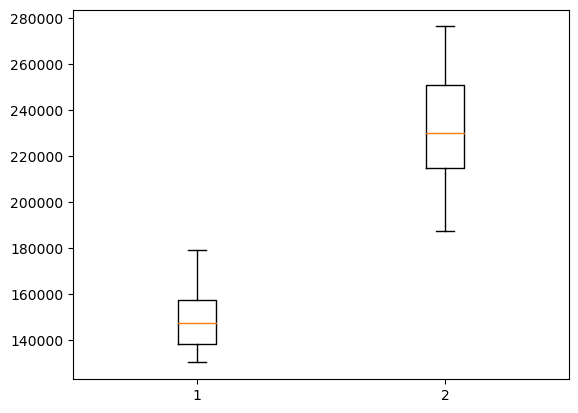

In [98]:
plt.boxplot(data[['Sales_before_digital_add(in $)','Sales_After_digital_add(in $)']],data=data)
plt.show()                                                            

                                                                 #Checking for outliers in dataset

Inference: No outliers detected.

# ● The company wishes to clarify whether there is any increase in sales after stepping into digital marketing.

Defining Null hypothesis and Level of Significance

Null hypothesis (H0):There is no increase in the sales after stepping into Digital Marketting

Alternate hypothesis(HA): There is an increase in the sales after stepping into Digital Marketting

Setting Level of Significance as 0.05

In [99]:
t_stat,p =stats.ttest_rel(data['Sales_After_digital_add(in $)'],data['Sales_before_digital_add(in $)'],alternative='greater')

In [100]:
print('t test statistic is %0.5f and P value is % 0.5f' %(t_stat, p))

t test statistic is 12.09071 and P value is  0.00000


In [101]:
if (p< 0.05):
    print('Null Hypothesis Rejected.')
else:
    print('Null Hypothesis to be accepted.')

Null Hypothesis Rejected.


Null hypothesis rejected .That is Alternate hypothesis accepted.

Inference:There is an increase in sales after stepping into Digital Marketting

# ● The company needs to check whether there is any dependency between the features “Region” and “Manager”.

Defining Null hypothesis and Level of Significance

Null hypothesis(h0):There is no significant dependancy between 'Region' and 'Manager'

Alternate hypothesis: There is some dependancy between 'Region' and 'Manager'

Setting Level of Significance as 0.05

In [102]:
data1 = pd.crosstab(data["Region"],data["Manager"])
data1

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


In [103]:
chi_stat,p_val,df,exp_val=stats.chi2_contingency(data1)


In [104]:
print('\nChi2 Statistic:',chi_stat)
print('\n P value is:',p_val)
print('\n Degree of freedom is:',df)
print('\nExpected Contingency Values:', exp_val)


Chi2 Statistic: 3.050566893424036

 P value is: 0.5493991051158094

 Degree of freedom is: 4

Expected Contingency Values: [[4.09090909 3.18181818 2.72727273]
 [2.86363636 2.22727273 1.90909091]
 [2.04545455 1.59090909 1.36363636]]


In [105]:
if (p_val < 0.05):
    print('Null Hypothesis Rejected.')
else:
    print('Null Hypothesis to be accepted.')

Null Hypothesis to be accepted.


Null hypothesis to be accepted .That is we reject Alternate hypothesis.


Inference: There is no significant dependancy between 'Region'and 'Manager.'